In [1]:
import pandas as pd

data = pd.read_csv("data.csv", index_col=0)
print(data[0:5])

   Math  Japanese
A    80        30
B    87        32
C    70        60
D    52        50
E    22        75


In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)
pred = model.predict(data)

data = pd.DataFrame(data)
data['Class'] = pred
print(data[0:5])

   Math  Japanese  Class
A    80        30      1
B    87        32      1
C    70        60      2
D    52        50      2
E    22        75      0


In [3]:
print(data.groupby('Class').mean())

        Math   Japanese
Class                  
0      29.00  84.666667
1      89.00  34.000000
2      69.25  64.250000


c:\Users\qqnq7\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\qqnq7\AppData\Local\Temp\ipykernel_2708\3910144614.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(X[i], y[i], str(data.index[i]), fontsize = 12)


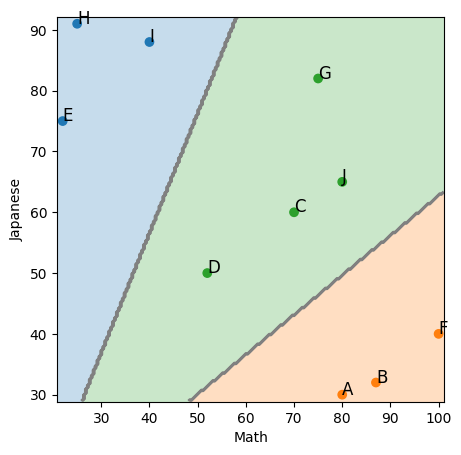

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_boundary(model, X, y, target, xlabel, ylabel):
    cmap_dots = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap(["#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize = (5, 5))
    if model:
        XX, yy = np.meshgrid(
            np.linspace(X.min() - 1, X.max() + 1, 200),
            np.linspace(y.min() - 1, y.max() + 1, 200)
        )
        pred = model.predict(np.c_[XX.ravel(), yy.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, yy, pred, cmap = cmap_fills, shading = "auto")
        plt.contour(XX, yy, pred, colors = "gray")
    plt.scatter(X, y, c = target, cmap = cmap_dots)
    for i in range(len(X)):
        plt.text(X[i], y[i], str(data.index[i]), fontsize = 12)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_boundary(model, df["Math"], df["Japanese"], df["Class"], "Math", "Japanese")